In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#modelling
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings

In [6]:
df = pd.read_csv('Salary Data.csv')

In [38]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [39]:
df.replace(['', 'NA', 'NaN','nan'], np.nan, inplace=True)
df.dropna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [40]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [77]:
# Impute numerical columns with their mean using 'df.fillna' for cleaner syntax
df.fillna({
    'Age': df['Age'].mean(),
    'Years of Experience': df['Years of Experience'].mean(),
    'Salary': df['Salary'].mean()
}, inplace=True)

# Impute categorical columns with their mode using 'df.fillna'
df.fillna({
    'Gender': df['Gender'].mode()[0],
    'Education Level': df['Education Level'].mode()[0],
    'Job Title': df['Job Title'].mode()[0]
}, inplace=True)

# Verify no missing values remain
missing_values_after = df.isnull().sum()
print(missing_values_after)

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [78]:
x = df.drop(columns=['Salary'],axis=1)

In [79]:
x.head()

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,Male,Bachelor's,Software Engineer,5.0
1,28.0,Female,Master's,Data Analyst,3.0
2,45.0,Male,PhD,Senior Manager,15.0
3,36.0,Female,Bachelor's,Sales Associate,7.0
4,52.0,Male,Master's,Director,20.0


In [80]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

Categories in 'Gender' variable:      ['Male' 'Female']


In [81]:
print("Categories in 'Education Level' variable:     ",end=" " )
print(df['Education Level'].unique())

Categories in 'Education Level' variable:      ["Bachelor's" "Master's" 'PhD']


In [82]:
print("Categories in 'Age' variable:     ",end=" " )
print(df['Age'].unique())

Categories in 'Age' variable:      [32.         28.         45.         36.         52.         29.
 42.         31.         26.         38.         48.         35.
 40.         27.         44.         33.         39.         25.
 51.         34.         47.         30.         41.         37.
 24.         43.         50.         46.         49.         23.
 53.         37.43163539]


In [83]:
print("Categories in 'Years of Experience' variable:     ",end=" " )
print(df['Years of Experience'].unique())

Categories in 'Years of Experience' variable:      [ 5.         3.        15.         7.        20.         2.
 12.         4.         1.        10.        18.         6.
 14.        16.         0.        22.        19.         9.
 13.        11.        25.        21.         8.        17.
 23.        24.         0.5        1.5       10.0308311]


In [84]:
print("Categories in 'Job Title' variable:     ",end=" " )
print(df['Job Title'].unique())

Categories in 'Job Title' variable:      ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst

In [85]:
y=df['Salary']

In [86]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 375, dtype: float64

In [87]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [88]:
x = preprocessor.fit_transform(x)

In [89]:
x.shape

(375, 181)

In [90]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((300, 181), (75, 181))

In [91]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [92]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6316.8420
- Mean Absolute Error: 3913.7389
- R2 Score: 0.9825
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 18353.5150
- Mean Absolute Error: 11844.8273
- R2 Score: 0.8609


Lasso
Model performance for Training set
- Root Mean Squared Error: 6329.0351
- Mean Absolute Error: 4009.0097
- R2 Score: 0.9824
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 18160.2595
- Mean Absolute Error: 11454.2533
- R2 Score: 0.8639


Ridge
Model performance for Training set
- Root Mean Squared Error: 9184.6846
- Mean Absolute Error: 6683.5906
- R2 Score: 0.9630
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14977.9752
- Mean Absolute Error: 9714.7079
- R2 Score: 0.9074


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 12262.0358
- Mean Absolute Error: 8203

In [93]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.907393
5,Random Forest Regressor,0.866947
1,Lasso,0.863862
0,Linear Regression,0.860949
3,K-Neighbors Regressor,0.852226
4,Decision Tree,0.816443


### Ridge Regression

In [102]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_model.fit(x_train, y_train)
ridge_pred = ridge_model.predict(x_test)

ridge_score = r2_score(y_test, ridge_pred) * 100
print(f"Accuracy of Ridge Regression: {ridge_score:.2f}%")


Accuracy of Ridge Regression: 90.74%


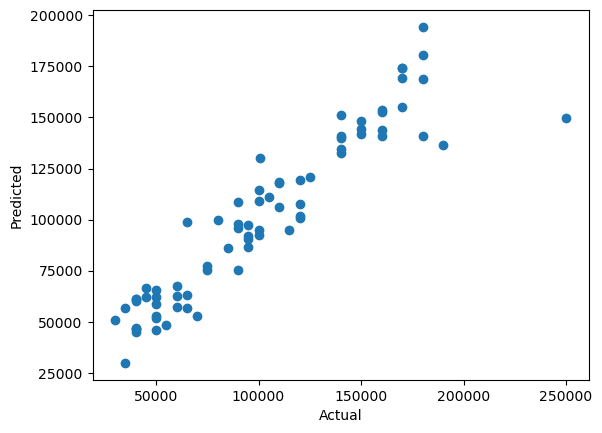

In [106]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

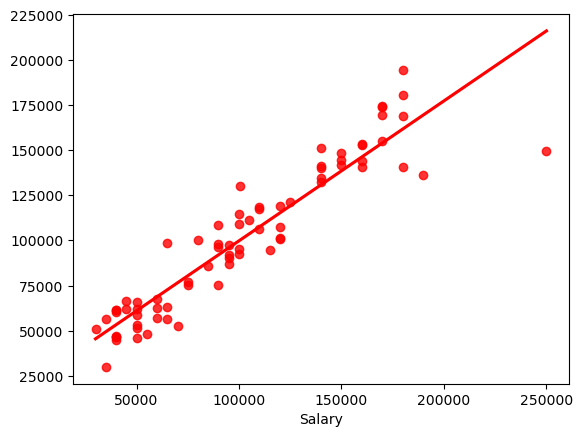

In [107]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [111]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
167,150000.0,141948.594045,8051.405955
33,65000.0,98785.049105,-33785.049105
15,125000.0,121076.157321,3923.842679
316,80000.0,99999.858307,-19999.858307
57,140000.0,132498.212975,7501.787025
...,...,...,...
94,75000.0,77102.908329,-2102.908329
196,90000.0,108691.497655,-18691.497655
350,160000.0,152744.760793,7255.239207
312,150000.0,148494.395824,1505.604176
